![One on Epsilon Logo](https://es-app.com/assets/eabs45.png)

# Wrapping up MATH TEACHERS CODE 2018


This notebook contains most of the key elements from Sessions 1-6 of the MATH TEACHERS CODE Series, 2018.

Videos describing this are in [One on Epsilon's YouTube Channel](https://www.youtube.com/channel/UCgJdh1-DfCRQ1O9w2ez5AkQ). 

You can also Look at [MATH TEACHERS CODE in Epsilon Stream](https://epsilonstream.com/topic/mathteacherscode).

Please register with us at [https://oneonepsilon.com/register/](https://oneonepsilon.com/register/)

Follow us on twitter: [@OneOnEpsilon](https://twitter.com/oneonepsilon)

## From Session #1 - The Hailstone Sequence and the Collatz Conjecture 
[YouTube Session #1](https://www.youtube.com/watch?v=JOmZAKxOSlk)

[Unsolved Math Problems on Epsilon Stream](https://epsilonstream.com/topic/unsolvedProblems)

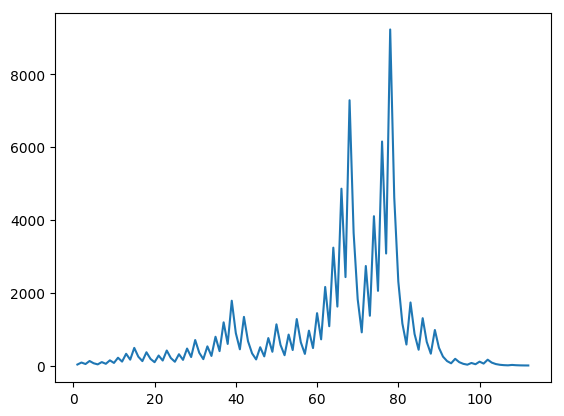

27 82 41 124 62 31 94 47 142 71 214 107 322 161 484 242 121 364 182 91 274 137 412 206 103 310 155 466 233 700 350 175 526 263 790 395 1186 593 1780 890 445 1336 668 334 167 502 251 754 377 1132 566 283 850 425 1276 638 319 958 479 1438 719 2158 1079 3238 1619 4858 2429 7288 3644 1822 911 2734 1367 4102 2051 6154 3077 9232 4616 2308 1154 577 1732 866 433 1300 650 325 976 488 244 122 61 184 92 46 23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1 

In [1]:
isEven(x) = x % 2 == 0
next(x) = isEven(x) ? Int(x/2) : 3x+1

function printHail(x)
    while x != 1
        print(x," ")
         x = next(x)
    end
    print(x," ")
end

function hailArray(x)
    arrOut = [x]
    while x != 1
        x = next(x)
        push!(arrOut,x)
    end
    return arrOut
end

using PyPlot
start = 27
out = hailArray(start)

n = length(out)
plot(1:n,out)

printHail(start)

## From Session #2 - Linear Congruential Generator 
[YouTube Session #2](https://youtu.be/823-2vC5Yig)

[Random Numbers on Epsilon Stream](https://epsilonstream.com/topic/random)

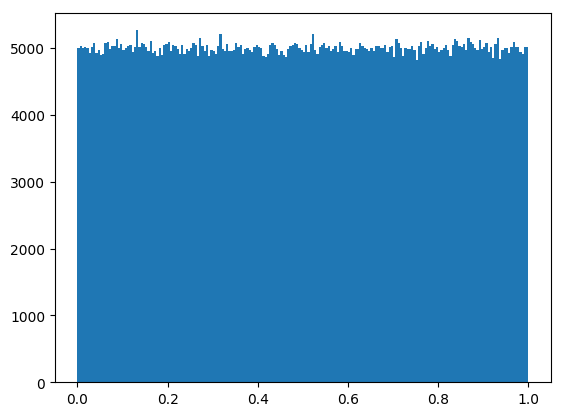

In [2]:
using Statistics,PyPlot
function myRand(seed,n)
    a, c, m = 69069, 1, 2^32
    x = seed
    arr = zeros(Float64,n)
    for i in 1:n
        x = (a*x + c) % m
        arr[i] = x/m
    end
    return arr
end

data = myRand(2001,10^6)
sum(data)/length(data) #arithmetic mean
mean(data),var(data),1/12 #theor variance
minimum(data),maximum(data)
numBins = 200
plt[:hist](data,numBins);

## From Session #2 - The Central Limit Theorem and The Normal Distribution

[The Normal Distribution on Epsilon Stream](https://epsilonstream.com/topic/normalDistribution)

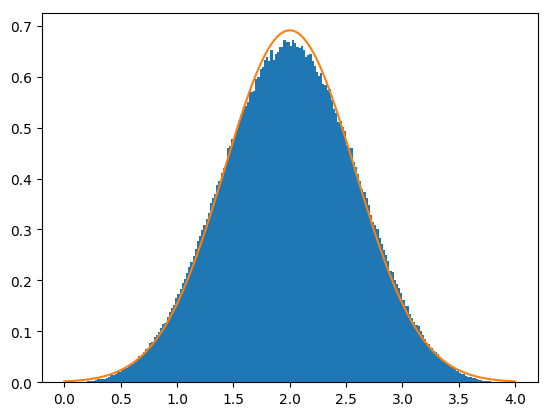

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [3]:
seed1, seed2, seed3, seed4 = 1957, 2008, 6454, 3423

n = 10^6
numBins = 200

data1 = myRand(seed1,n)
data2 = myRand(seed2,n)
data3 = myRand(seed3,n)
data4 = myRand(seed4,n)

plt[:hist]( data1 + data2 + data3 + data4,numBins,normed=true);

f(x) = (1/sqrt(2pi))*exp(-x^2/2)
g(x,mu,sig) = f((x-mu)/sig)*(1/sig)

xGrid = 0:0.01:4.0
yVals = [g(x,2,sqrt(4/12)) for x in xGrid]
plot(xGrid,yVals);

## From Session #3 - Computing Pi via a series approximation

[YouTube Session #3](https://youtu.be/CTOU21r1LPU)

[Series on Epsilon Stream](https://epsilonstream.com/topic/series)

$\sum_{k=1}^\infty \frac{1}{k^2} = \frac{\pi^2}{6}$

In [4]:
n = 10000
sqrt( 6*sum([1/k^2 for k in 1:n]) )

3.1414971639472102

## From Session #3 - Computing Pi by inscribing regular polygons

[Regular Polygons on Epsilon Stream](https://epsilonstream.com/topic/regularPolygon)


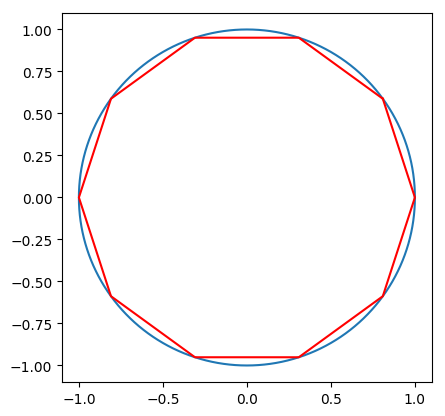

3.090169943749474

In [5]:
using PyPlot
circlePts = [ [cos(deg2rad(a)),sin(deg2rad(a))] for a in 0:1:360]

subplot(111,aspect=1)
plot(first.(circlePts),last.(circlePts))
function makePts(n)
 th = 360/n
 return [ [cos(deg2rad(k*th)),sin(deg2rad(k*th))] for k in 1:n+1]
end

pts = makePts(10)
plot(first.(pts),last.(pts),"r")

function dist(w,v)
 sqrt((w[1]-v[1])^2 + (w[2]-v[2])^2)
end

sum([ dist(pts[k],pts[k+1]) for k in 1:length(pts)-1])/2

## From Session #3 - Computing Pi by counting pixels

[Pi on Epsilon Stream](https://epsilonstream.com/topic/pi)

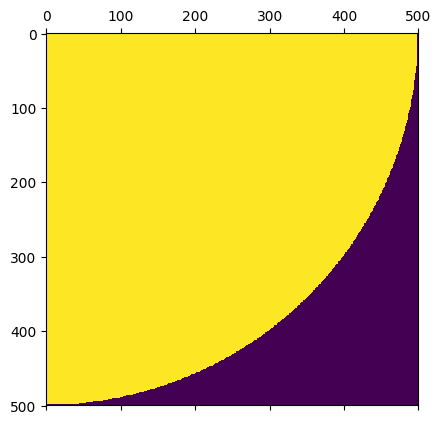

3.133392

In [6]:
using PyPlot

n = 500
mat = zeros(n,n)
for i in 1:n
    for j in 1:n
        if i^2 + j^2 <= n^2
            mat[i,j] = 1
        end
    end
end

matshow(mat)
4*sum(mat)/n^2

## From Session #3 - Computing Pi with random points

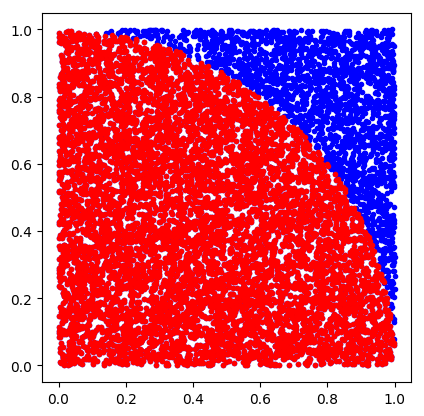

3.1292

In [7]:
using PyPlot
n = 10^4

pts = [ [rand(), rand()] for _ in 1:n]

subplot(111,aspect=1)
plot(first.(pts),last.(pts),"b.")

inCirc(pt) = pt[1]^2 + pt[2]^2 <= 1
circPts = filter(inCirc,pts)

plot(first.(circPts),last.(circPts),"r.")
4*length(circPts)/n

## From Session #4 - The digits of a number in a given base

[YouTube Session #4](https://youtu.be/XVRlFPv34eM)

In [8]:
N = 34234
b = 8

dig = digits(N,base = b)
println(dig)

sum([dig[k]*b^(k-1) for k in 1:length(dig)])

[2, 7, 6, 2, 0, 1]


34234

## From Session #4 - A question about bases

[@jamestanton](https://twitter.com/jamestanton) Oct 9, 2018

N has 1 digit in base N+1 and more digits in base 2. Let A(N) be the average number of digits of N when
represented in bases 2,3,...,N+1.

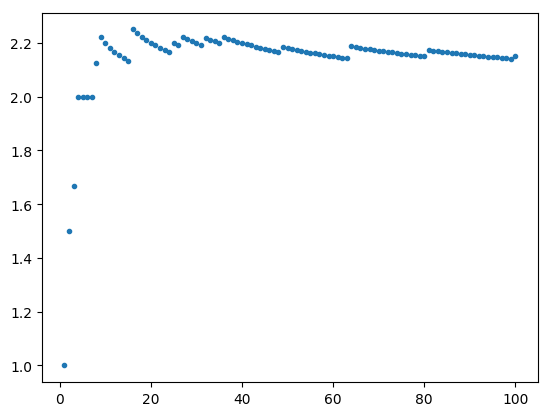

2.00985

In [9]:
using Statistics, PyPlot

A(N) = mean([ length(digits(N,base = b)) for b in 2:N+1])
Nmax = 100

plot(1:Nmax,A.(1:Nmax),".")
A(20000)

## From Session #4 - The N->1 Machine in Exploding Dots

[The Global Math Project](https://www.globalmathproject.org/learn/)

[Exploding Dots on Epsilon Stream](https://epsilonstream.com/topic/explodingDots)

In [10]:
M = 5
b = 10
#The b->1 machine
function explode(arr)
    newArr = copy(arr) #creates a copy of the array so we can work on it....
    for k in 1:M-1
        if arr[k] >= b
            #do an explosion... and quit...
            newArr[k] -= b
            newArr[k+1] += 1
            return newArr
        end
    end
    return newArr
end

b = 2
arr = [19,0,0,0,0]

while true
    println(arr)
    newArr = explode(arr)
    if newArr == arr #if no explosion
        break
    end
    arr = newArr
end

[19, 0, 0, 0, 0]
[17, 1, 0, 0, 0]
[15, 2, 0, 0, 0]
[13, 3, 0, 0, 0]
[11, 4, 0, 0, 0]
[9, 5, 0, 0, 0]
[7, 6, 0, 0, 0]
[5, 7, 0, 0, 0]
[3, 8, 0, 0, 0]
[1, 9, 0, 0, 0]
[1, 7, 1, 0, 0]
[1, 5, 2, 0, 0]
[1, 3, 3, 0, 0]
[1, 1, 4, 0, 0]
[1, 1, 2, 1, 0]
[1, 1, 0, 2, 0]
[1, 1, 0, 0, 1]


## From Session #5 - The Roots of a Quadratic Equation

[YouTube Session #5](https://www.youtube.com/watch?v=emkl9l3ojZk)
[Quadratic Equations on Epsilon Stream](https://epsilonstream.com/topic/quadraticEquation)

Roots of the equation: (

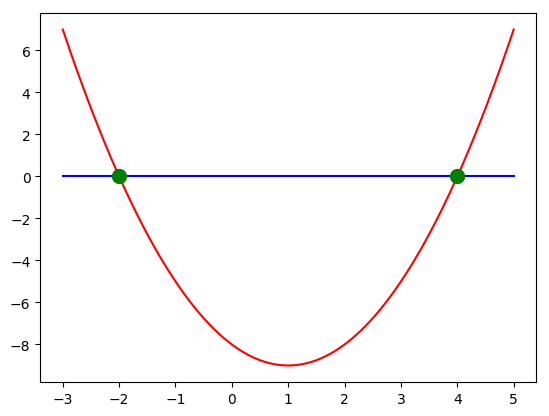

-2.0, 4.0)


In [11]:
using PyPlot

a, b, c = 1, -2, -8
f1(x) = a*x^2 + b*x + c

#This returns the tuple of solutions of the quadratic equation ax^2+bx+c = 0
sols(a,b,c) = (-b - sqrt(b^2 - 4*a*c))/2a, (-b + sqrt(b^2 - 4*a*c))/2a

solutions = sols(a,b,c)
xDomain = -3:0.01:5

plot(xDomain,f1.(xDomain),"r")
plot([-3, 5],[0,0],"b");
plot([solutions[1],solutions[2]],[0,0],"g.",ms="20")

println("Roots of the equation: ", solutions)

## From Session #5 - Finding the  Roots with Brute Force Search

In [12]:
a, b, c = 1, -2, -8
f1(x) = a*x^2 + b*x + c

# This function looks for roots of the mathematical function f() over grid
function findRoots(f,grid)
    sgn = sign.(f.(grid))
    roots = []
    for i in 1:length(sgn)-1
        if sgn[i] != sgn[i+1] && sgn[i] != 0
            push!(roots, (grid[i] + grid[i+1])/2 )
        end
    end
    return roots
end

findRoots(f1,-10:0.001:10)

2-element Array{Any,1}:
 -2.0004999999999997
  3.9995000000000003

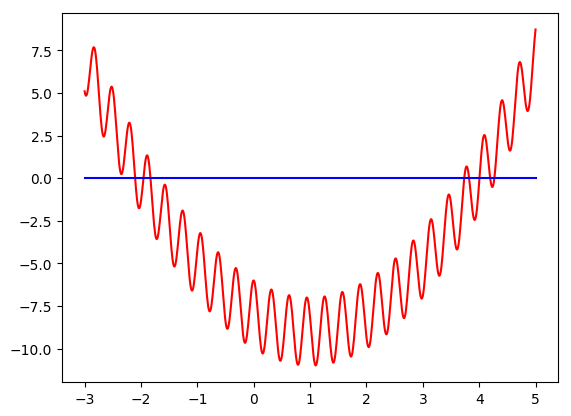

8-element Array{Any,1}:
 -2.1045            
 -1.9575            
 -1.8325            
  3.7344999999999997
  3.8215000000000003
  4.0045            
  4.1955            
  4.2695            

In [13]:
f2(x) = f1(x) + 2*cos(20x)

plot(xDomain,f2.(xDomain),"r")
plot([-3,5],[0,0],"b");

rts = findRoots(f2,-10:0.001:10)

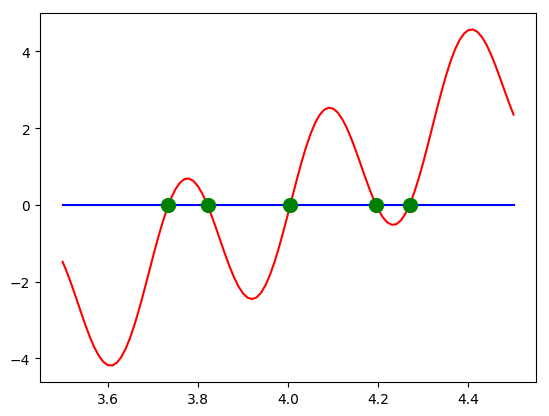

In [14]:
fineDomain = 3.5:0.01:4.5
plot(fineDomain,f2.(fineDomain),"r")
plot([3.5,4.5],[0,0],"b")

posRoots = filter(x->(x>0),rts)
plot(posRoots,zeros(length(posRoots)), "g.", ms = "20");

## Session #6 - (Very basic) Optimization

[YouTube Session #6](https://www.youtube.com/watch?v=tvA8tvn744k)

[Optimization on Epsilon Stream](https://epsilonstream.com/topic/optimization)

$\frac{d}{dx} (a x^2 + b x + c) = 2ax + b$

$2ax+ b= 0 \qquad \Rightarrow \qquad  x = -\frac{b}{2a}$


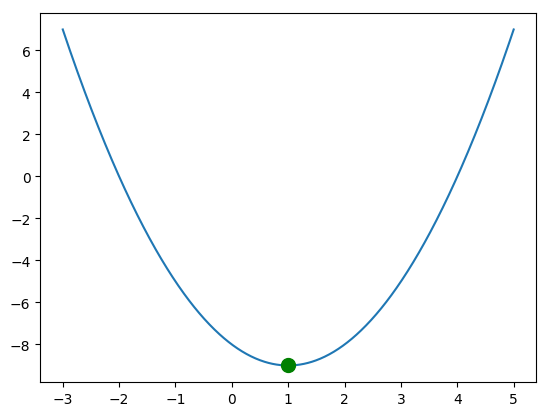

In [15]:
a, b, c = 1, -2, -8
f1(x) = a*x^2 + b*x + c

xDomain = -3:0.01:5
plot(xDomain,f1.(xDomain));

analyticArgMin = -b/2a
plot(analyticArgMin,f1(analyticArgMin),"g.",ms="20");

In [16]:
argMin = NaN
minVal = Inf

for x in xDomain
    if f1(x) < minVal
        argMin = x
        minVal = f1(x)
    end
end

println("Found a minimum at $(argMin), with a value of $(minVal).")

Found a minimum at 1.0, with a value of -9.0.


In [17]:
minVal,minIndex = findmin(f1.(xDomain))
println("Found a minimum at index $(minIndex) which is at x=$(xDomain[minIndex]) and has a value of $(minVal).")

Found a minimum at index 401 which is at x=1.0 and has a value of -9.0.
